### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
%matplotlib inline


In [2]:
pwd = os.getcwd()

In [3]:
df_ori=pd.read_csv(pwd + "/DataSet/understat.com.csv")
df_ori.head()

,Unnamed: 0,Unnamed: 1,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,94,102.980152,-7.019848,97.777212,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,92,95.766243,-22.233757,86.103895,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,78,57.047670,-9.952330,52.588008,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,77,55.062500,-14.937500,49.703978,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,76,69.526624,-1.473376,62.094599,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


In [4]:
df = df_ori.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    684 non-null    object 
 1   Unnamed: 1    684 non-null    int64  
 2   position      684 non-null    int64  
 3   team          684 non-null    object 
 4   matches       684 non-null    int64  
 5   wins          684 non-null    int64  
 6   draws         684 non-null    int64  
 7   loses         684 non-null    int64  
 8   scored        684 non-null    int64  
 9   missed        684 non-null    int64  
 10  pts           684 non-null    int64  
 11  xG            684 non-null    float64
 12  xG_diff       684 non-null    float64
 13  npxG          684 non-null    float64
 14  xGA           684 non-null    float64
 15  xGA_diff      684 non-null    float64
 16  npxGA         684 non-null    float64
 17  npxGD         684 non-null    float64
 18  ppda_coef     684 non-null    

### Data Cleaning

In [5]:
# Name the unnamed columns

df.rename(columns = {"Unnamed: 0": "league", "Unnamed: 1":"year"}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        684 non-null    object 
 1   year          684 non-null    int64  
 2   position      684 non-null    int64  
 3   team          684 non-null    object 
 4   matches       684 non-null    int64  
 5   wins          684 non-null    int64  
 6   draws         684 non-null    int64  
 7   loses         684 non-null    int64  
 8   scored        684 non-null    int64  
 9   missed        684 non-null    int64  
 10  pts           684 non-null    int64  
 11  xG            684 non-null    float64
 12  xG_diff       684 non-null    float64
 13  npxG          684 non-null    float64
 14  xGA           684 non-null    float64
 15  xGA_diff      684 non-null    float64
 16  npxGA         684 non-null    float64
 17  npxGD         684 non-null    float64
 18  ppda_coef     684 non-null    

In [6]:
# Apply more approriate labels to columns 

df.rename(columns = {"scored": "goals_scored", "missed":"goals_conceded"}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   league          684 non-null    object 
 1   year            684 non-null    int64  
 2   position        684 non-null    int64  
 3   team            684 non-null    object 
 4   matches         684 non-null    int64  
 5   wins            684 non-null    int64  
 6   draws           684 non-null    int64  
 7   loses           684 non-null    int64  
 8   goals_scored    684 non-null    int64  
 9   goals_conceded  684 non-null    int64  
 10  pts             684 non-null    int64  
 11  xG              684 non-null    float64
 12  xG_diff         684 non-null    float64
 13  npxG            684 non-null    float64
 14  xGA             684 non-null    float64
 15  xGA_diff        684 non-null    float64
 16  npxGA           684 non-null    float64
 17  npxGD           684 non-null    flo

In [7]:
# Check for missing values

df.isna().sum()

league            0
year              0
position          0
team              0
matches           0
wins              0
draws             0
loses             0
goals_scored      0
goals_conceded    0
pts               0
xG                0
xG_diff           0
npxG              0
xGA               0
xGA_diff          0
npxGA             0
npxGD             0
ppda_coef         0
oppda_coef        0
deep              0
deep_allowed      0
xpts              0
xpts_diff         0
dtype: int64

In [8]:
df.shape

(684, 24)

**Insight:** There are a total of 684 observations of the 24 features taken into consideration for this dataset.

**Insight:** All columns except the "league" column contain numerical values.

**Insight:** There are no missing values in the dataset.

In [9]:
# Check statistical summary of all numerical columns.

df.describe()

,year,position,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,6.840000e+02,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2016.500000,10.061404,35.935673,13.434211,9.067251,13.434211,48.190058,48.190058,49.369883,47.064744,-1.125315,42.902596,47.064744,-1.125315,42.902596,2.792600e-16,10.911784,10.911772,208.676901,208.676901,49.539598,0.169715
std,1.709075,5.580165,3.203487,5.880962,2.941824,5.510278,17.605374,13.866509,16.957678,14.595888,6.848179,13.695898,11.781399,6.663632,11.002013,1.929269e+01,2.521398,3.301410,83.888073,54.713624,13.559213,7.156998
min,2014.000000,1.000000,27.000000,2.000000,2.000000,1.000000,13.000000,15.000000,13.000000,15.064491,-30.963020,13.166872,16.838674,-29.175087,16.084399,-4.220877e+01,5.683535,4.394458,76.000000,83.000000,17.907700,-24.721600
25%,2015.000000,5.000000,34.000000,9.000000,7.000000,9.000000,36.000000,38.000000,38.000000,37.126256,-4.985319,33.811014,38.916186,-5.698828,35.474606,-1.325816e+01,9.090617,8.809866,151.750000,170.000000,39.466550,-4.498400
50%,2016.500000,10.000000,38.000000,12.000000,9.000000,14.000000,45.000000,48.000000,46.000000,44.706130,-0.608827,40.071031,47.310924,-0.918895,43.031911,-3.127901e+00,10.562543,10.347047,188.000000,205.000000,47.102100,0.116050
75%,2018.000000,15.000000,38.000000,16.000000,11.000000,17.000000,56.000000,58.000000,59.250000,53.864159,3.587158,49.220690,54.834899,3.381834,50.263465,9.740049e+00,12.434874,12.187434,242.000000,246.250000,56.942025,4.912775
max,2019.000000,20.000000,38.000000,32.000000,18.000000,29.000000,118.000000,94.000000,100.000000,113.598270,18.148854,99.477020,88.432186,16.370737,78.535447,7.304931e+01,21.896752,30.468113,582.000000,375.000000,94.380000,23.047500


**Insight:** The data contains statistics between 2014 and 2019.

**Insight:** The highest number of points accumulated in a single season by any team over these years is 100.

**Insight:** The highest number of wins in a single season by a team over these years is 32 while the highest number of losses is 29.

### Exploratory Data Analysis

In [10]:
# What are the leagues in this dataset?

df.league.unique()

array(['La_liga', 'EPL', 'Bundesliga', 'Serie_A', 'Ligue_1', 'RFPL'],
      dtype=object)

In [11]:
# How many goals were scored across the 6 leagues in the period covered?

print(f"A total of {df.pts.sum()} points were picked up in this period")

A total of 33769 points were picked up in this period


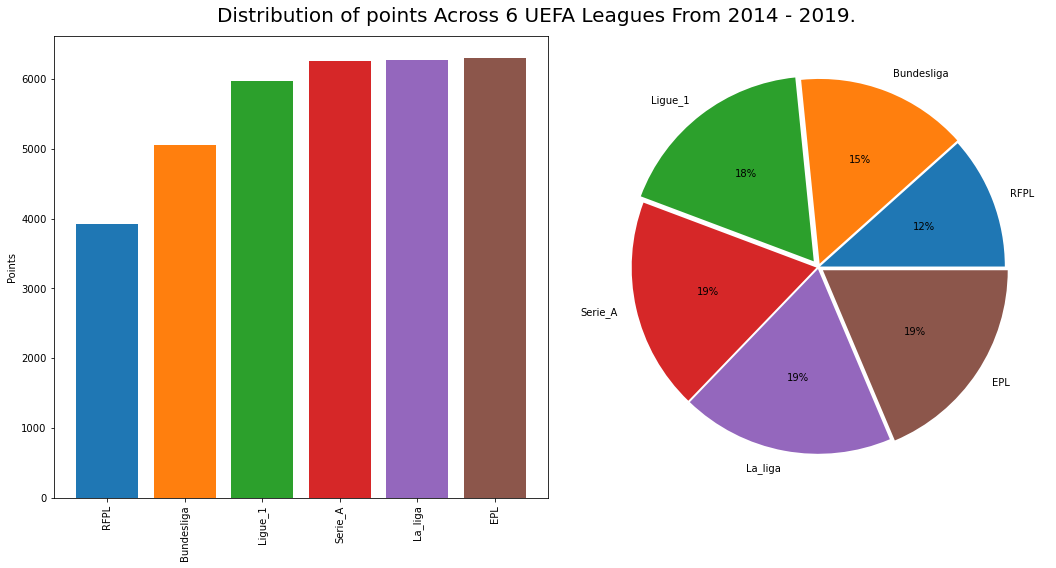

In [12]:
plt.figure(figsize = [15,8])

points_by_league = df.groupby("league")["pts"].sum(
    ).sort_values(ascending = True)

plt.subplot(1,2,1)
plt.bar(
    x = points_by_league.index,
    height = points_by_league,
    color = sns.color_palette()
)
plt.ylabel("Points")
plt.xticks(rotation = 90);
plt.suptitle("Distribution of points Across 6 UEFA Leagues From 2014 - 2019.", fontsize = 20);

plt.subplot(1,2,2)
explode = np.array([0.01, 0.02, 0.04, 0.01, 0.01, 0.03])
plt.pie(x = points_by_league, labels = points_by_league.index, autopct = "%.0f%%", explode = explode);

plt.tight_layout()

**Insight:** Of the 33769 points picked up in this period, the EPL, La liga and Serie A contributed an equal equivalent of 19% each.

**Insight:** The RPFL contributed the only 4000 points (12%) of the overall sum.

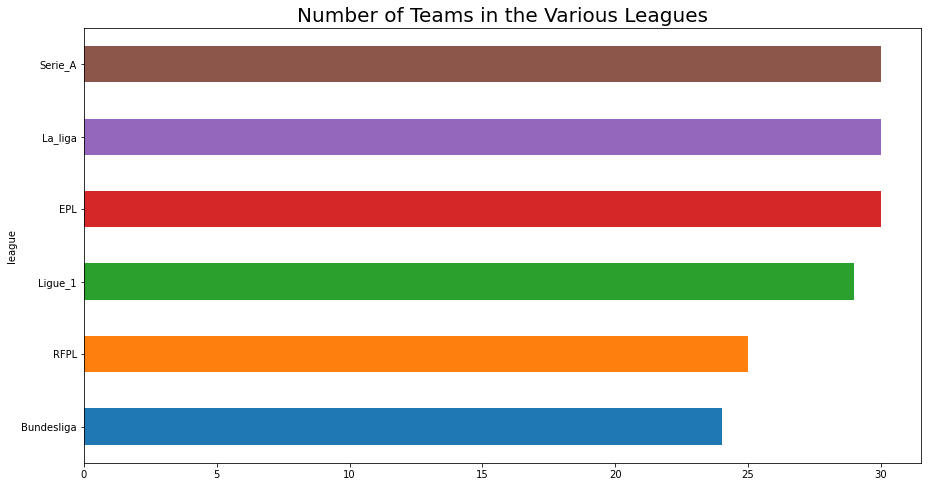

In [13]:
# How many teams are there in the leagues?

plt.figure(figsize = [15, 8])
palette = sns.color_palette()
(df.groupby('league').team.nunique().sort_values()).plot.barh(color=palette);
plt.title("Number of Teams in the Various Leagues", fontsize = 20);

**Insight:** __Serie_A__, __La_liga__ and __EPL__ has the highest participation over the period (30 teams), followed by __Ligue_1__ (29 teams), then __RFPL__ (25 teams) and __Bundesliga__ (24 teams). 

**Question:** Could the number of teams have contributed to the number of points won?

In [14]:
# What's the average number of points picked by each team in the various leagues over the period?

def avg_points(df):
    """This function calculates the average number of points picked up by teams in a particular league.

    Args:
        df (pandas.core.frame.DataFrame): DataFrame of stats from a particular league. 

    Returns:
        avg_points (numpy.int64): The average number of points picked up by teams in a league.
    """
    total_points = df["pts"].sum()
    number_of_teams = df["team"].nunique()

    avg_points = total_points // number_of_teams

    return avg_points

In [15]:
def total_points_plot(df, color):
    """This function plots the total number of points by the top teams in a particular league.

    Args:
        df (pandas.core.frame.DataFrame): DataFrame of stats from a particular league.
        color (hex code): This is the hex code for the theme color of the particular league.
                                eg: "#38003c" could be passed for premier league
    """
    plt.figure(figsize = [15, 8])

    df.groupby("team")["pts"].sum().sort_values().tail(10).plot(kind = "barh", color = color)

In [16]:
def winners_plot(df, color):
    """This function plots the winners of a particular league and the number of times they won the league.

    Args:
        df (pandas.core.frame.DataFrame): DataFrame of stats from a particular league.
        color (hex code): This is the hex code for the theme color of the particular league.
                                eg: "#38003c" could be passed for premier league
    """
    plt.figure(figsize = [15, 8])

    df[df['position'] == 1].groupby('team').pts.count().sort_values(ascending=False).plot.bar(color=color);
    
    plt.ylabel("Number of Wins")

In [17]:
def rel(x, y):
    """This is a function that prints correlation scatter plots for two columns in a Pandas DataFrame.

    Args:
        x : Pandas DataFrame column 
        y : Pandas DataFrame column
    """
    plt.figure(figsize = [15, 8])
    
    sns.regplot(data = df, x = x, y = y, scatter_kws={'alpha':0.5}, fit_reg = False)

    plt.title(f"Correlation between {x} and {y} is {df[x].corr(df[y]).round(2)}", fontsize = 20)
    plt.show()

### Since we have different level of team participation in the leagues, we ought to analyze the leagues seperately.

### EPL

In [18]:
# Subset the EPL league

EPL_df = df[df.league=='EPL']
EPL_df.head()

,league,year,position,team,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
120,EPL,2014,1,Chelsea,38,26,9,3,73,32,87,68.643320,-4.356680,64.740402,31.524344,-0.475656,29.240835,35.499567,10.942027,13.419520,407,171,75.3172,-11.6828
121,EPL,2014,2,Manchester City,38,24,7,7,83,38,79,75.815441,-7.184559,69.609091,40.499403,2.499403,37.454762,32.154329,7.982490,15.076979,575,144,73.0982,-5.9018
122,EPL,2014,3,Arsenal,38,22,9,7,71,36,75,69.802591,-1.197409,64.474404,35.718825,-0.281175,33.435352,31.039052,8.660596,13.254169,398,171,75.1740,0.1740
123,EPL,2014,4,Manchester United,38,20,10,8,62,37,70,54.206860,-7.793140,50.401013,39.842347,2.842347,36.797702,13.603311,7.648715,15.521977,267,194,63.0327,-6.9673
124,EPL,2014,5,Tottenham,38,19,7,12,58,53,64,52.385284,-5.614716,48.427014,57.044148,4.044148,51.598938,-3.171924,8.000237,11.300694,210,232,48.9361,-15.0639


In [19]:
# Let's look at a statistical summary for the EPL 

EPL_df.describe()

,year,position,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,120.000000,120.000000,120.0,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2016.500000,10.500000,38.0,14.450000,9.10000,14.450000,51.575000,51.575000,52.450000,50.762647,-0.812353,47.219513,50.762647,-0.812353,47.219513,1.184238e-16,11.847171,11.847171,249.566667,249.566667,52.563676,0.113676
std,1.714986,5.790459,0.0,6.293721,2.87674,5.843692,17.282946,12.796837,17.987788,14.326816,6.333911,13.364947,10.942834,6.631225,10.209264,2.177329e+01,2.867043,4.057951,105.688836,58.937046,14.487114,7.532755
min,2014.000000,1.000000,38.0,3.000000,2.00000,1.000000,22.000000,22.000000,16.000000,26.527059,-23.203113,25.004717,24.511918,-16.990427,22.687925,-3.286364e+01,6.677875,6.019176,125.000000,96.000000,29.610600,-24.721600
25%,2015.000000,5.750000,38.0,10.000000,7.00000,10.000000,39.000000,41.000000,40.000000,39.946644,-5.010837,37.595824,43.426284,-4.805464,39.626458,-1.558507e+01,9.695005,9.465287,177.250000,201.750000,40.974200,-4.531925
50%,2016.500000,10.500000,38.0,12.000000,9.00000,15.000000,47.500000,51.500000,47.000000,48.225979,-0.262619,45.018551,52.228541,-1.190465,48.420051,-6.045744e+00,11.441113,10.906504,211.500000,258.500000,48.825900,1.283300
75%,2018.000000,15.250000,38.0,18.250000,11.00000,19.000000,62.250000,60.250000,64.500000,57.881744,3.582894,53.445427,57.631333,3.933579,53.469849,1.366552e+01,13.538645,12.674218,282.500000,297.250000,61.924575,5.321300
max,2019.000000,20.000000,38.0,32.000000,17.00000,28.000000,106.000000,81.000000,100.000000,102.205233,12.562637,93.533026,73.586610,15.540152,68.258560,6.798795e+01,21.896752,30.468113,582.000000,357.000000,91.089300,14.034500


**Insight:** The highest number of points recorded in a single season of __EPL__ is 100.

**Insight:** A maximum of 38 matches are played per team per season in the __EPL__.

In [20]:
# What's the average number of points picked up by EPL teams over the period?

epl_ptsAvg = avg_points(EPL_df)

print("An average of", "\033[1m" + f"{epl_ptsAvg}" + "\033[0m", "pts were picked up by EPL teams over the period.")

An average of 209 pts were picked up by EPL teams over the period.


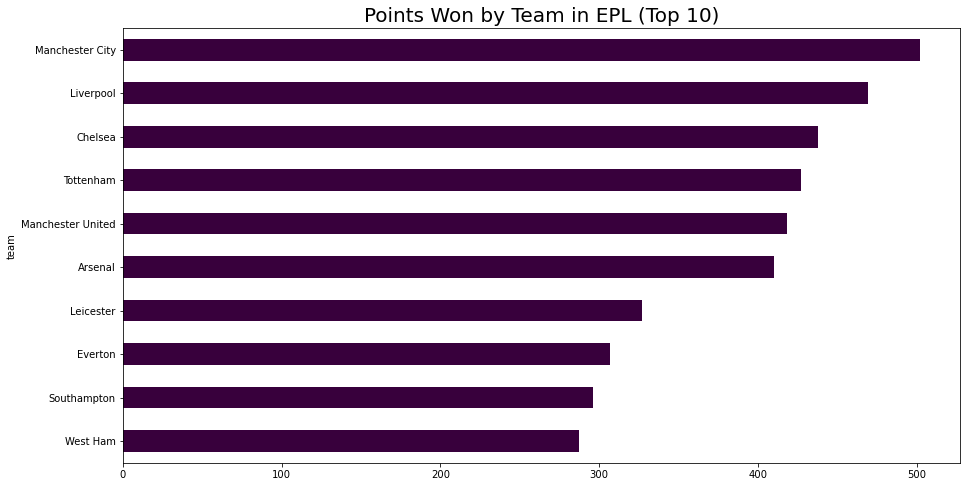

In [21]:
total_points_plot(EPL_df, color = "#38003c")
plt.title('Points Won by Team in EPL (Top 10)', fontsize = 20);


**Insight:** Manchester City dominated the EPL over the period grabbing the highest number of points.

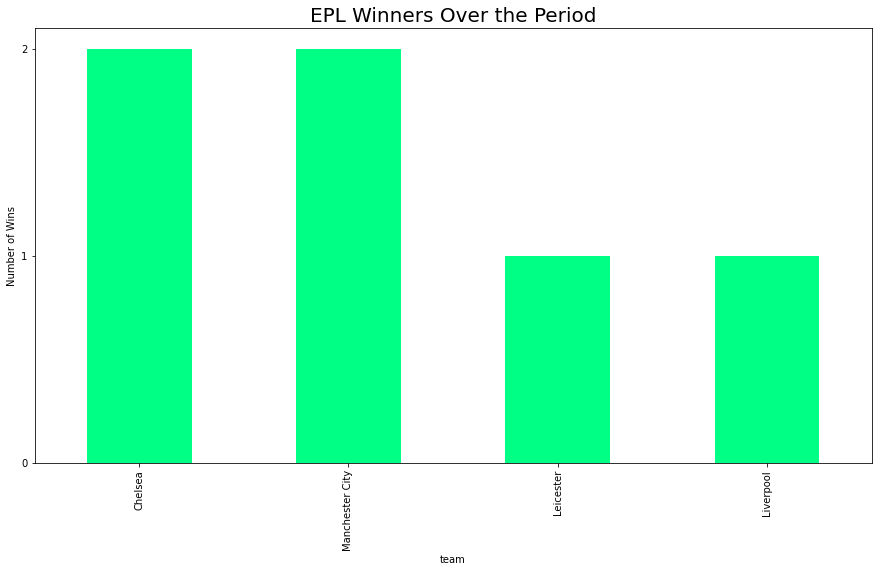

In [22]:
winners_plot(EPL_df, color='#00ff85')
plt.yticks(ticks = [0, 1, 2])
plt.title("EPL Winners Over the Period", fontsize = 20 );

**Insight:** The winning teams in __EPL__ over the period are Chelsea (2 seasons), Leicester (1 sesaon), Manchester City (2 seasons) and Liverpool (1 season).

### La_liga

In [23]:
# Subset the La Liga

La_liga = df[df.league=='La_liga']
La_liga.head()

,league,year,position,team,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,94,102.980152,-7.019848,97.777212,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,92,95.766243,-22.233757,86.103895,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,78,57.047670,-9.952330,52.588008,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,77,55.062500,-14.937500,49.703978,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,76,69.526624,-1.473376,62.094599,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


In [24]:
# Let's look at a statistical summary for the La Liga 

La_liga.describe()

,year,position,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,120.000000,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2016.500000,10.500000,38.0,14.225000,9.550000,14.225000,50.991667,50.991667,52.225000,50.590325,-0.401342,46.095271,50.590325,-0.401342,46.095271,-2.960595e-17,9.654516,9.654516,214.000000,214.000000,52.438788,0.213788
std,1.714986,5.790459,0.0,6.265099,2.933005,5.679778,19.409127,13.935322,17.750589,15.695525,7.748572,14.682104,10.055751,7.958727,9.257804,2.071048e+01,1.638062,2.421631,95.210602,41.101023,13.481785,7.652968
min,2014.000000,1.000000,38.0,3.000000,2.000000,1.000000,22.000000,18.000000,20.000000,29.560107,-22.448406,27.534686,27.797052,-29.175087,24.727907,-4.220877e+01,5.683535,5.579031,91.000000,114.000000,26.495100,-17.401100
25%,2015.000000,5.750000,38.0,10.000000,8.000000,12.000000,40.000000,42.750000,40.500000,40.486799,-5.134395,36.290534,44.072260,-6.199896,40.131640,-1.341264e+01,8.765096,7.772162,147.750000,185.750000,42.816800,-5.012150
50%,2016.500000,10.500000,38.0,13.000000,9.500000,14.000000,46.000000,51.000000,49.000000,47.133680,1.125551,42.978246,50.644413,-0.069773,46.447073,-3.646443e+00,9.638156,9.252798,190.000000,216.000000,50.445450,0.607750
75%,2018.000000,15.250000,38.0,18.000000,11.000000,18.250000,56.000000,61.000000,60.250000,54.961149,4.651436,50.416723,57.745313,6.035948,51.328576,8.312188e+00,10.781221,11.022032,241.250000,245.500000,58.331300,5.141800
max,2019.000000,20.000000,38.0,30.000000,18.000000,28.000000,118.000000,94.000000,94.000000,113.598270,13.875215,99.477020,78.863255,14.419298,72.013818,7.304931e+01,14.086311,17.961598,570.000000,309.000000,94.380000,20.158700


**Insight:** The highest number of points recorded in a single season of __La Liga__ is 94.

**Insight:** A maximum of 38 matches are played per team per season in the __La Liga__.

In [25]:
# What's the average number of points picked up by La Liga teams over the period?

laliga_ptsAvg = avg_points(La_liga)

print("An average of", "\033[1m" + f"{laliga_ptsAvg}" + "\033[0m", "pts were picked up by La Liga teams over the period.")

An average of 208 pts were picked up by La Liga teams over the period.


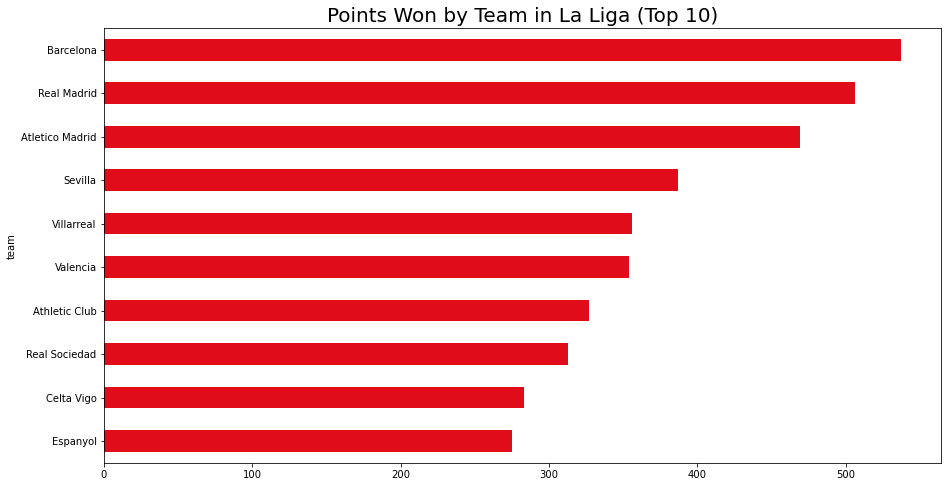

In [26]:
total_points_plot(La_liga, color = "#e00c1a")
plt.title('Points Won by Team in La Liga (Top 10)', fontsize = 20);

**Insight:** Barcelona has dominated the La Liga over the period grabbing the highest number of points.

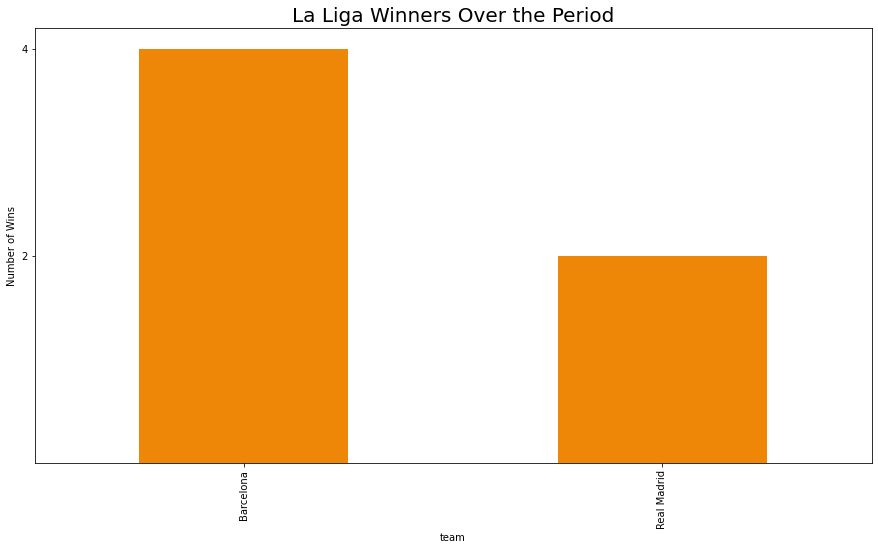

In [27]:
winners_plot(La_liga, color='#ee8707')
plt.yticks(ticks = [2, 4])
plt.title("La Liga Winners Over the Period", fontsize = 20 );

**Insight:** The winning teams in __La Liga__ over the period are Barcelona (4 seasons) and Real Madrid (2 seasons).

### Serie_A

In [28]:
# Subset the Serie A 

Serie_A = df[df.league=='Serie_A']
Serie_A.head()

,league,year,position,team,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
348,Serie_A,2014,1,Juventus,38,26,9,3,72,24,87,59.077044,-12.922956,52.225435,29.129634,5.129634,25.218658,27.006777,8.715008,13.017563,334,152,74.7890,-12.2110
349,Serie_A,2014,2,Roma,38,19,13,6,54,31,70,50.853662,-3.146338,45.524584,36.787303,5.787303,32.980881,12.543703,7.874105,13.878387,266,175,62.1641,-7.8359
350,Serie_A,2014,3,Lazio,38,21,6,11,71,38,69,61.996225,-9.003775,58.189765,35.871453,-2.128547,31.303666,26.886099,7.282635,11.223855,214,173,67.7905,-1.2095
351,Serie_A,2014,4,Fiorentina,38,18,10,10,61,46,64,60.670595,-0.329405,55.310973,48.502489,2.502489,46.218629,9.092344,7.757888,12.457943,309,170,61.1128,-2.8872
352,Serie_A,2014,5,Napoli,38,18,9,11,70,54,63,64.495380,-5.504620,57.539230,34.373501,-19.626499,32.850910,24.688320,8.836460,13.312875,281,137,70.7221,7.7221


In [29]:
# Let's look at a statistical summary

Serie_A.describe()

,year,position,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2016.500000,10.500000,37.916667,14.208333,9.500000,14.208333,52.491667,52.491667,52.125000,51.026213,-1.465454,45.864169,51.026213,-1.465454,45.864169,2.072416e-16,11.054684,11.050871,227.450000,227.450000,52.373047,0.248047
std,1.714986,5.790459,0.277544,6.329730,3.111378,5.994249,16.297649,13.714983,18.184194,12.386373,7.267452,11.340868,12.048333,6.560906,10.872920,2.048413e+01,2.434392,3.150657,63.976079,56.405174,14.042052,7.715796
min,2014.000000,1.000000,37.000000,2.000000,3.000000,3.000000,25.000000,20.000000,15.000000,28.915261,-26.771265,28.153961,22.998835,-19.626499,19.920635,-3.929609e+01,6.444858,5.757820,112.000000,100.000000,29.381300,-21.494200
25%,2015.000000,5.750000,38.000000,10.000000,7.000000,10.000000,39.750000,43.000000,40.000000,41.998333,-5.842907,37.178089,42.463956,-5.431337,37.792601,-1.509991e+01,9.088270,8.748903,177.000000,184.500000,40.317925,-4.346975
50%,2016.500000,10.500000,38.000000,12.000000,9.000000,14.000000,49.000000,52.000000,47.500000,49.541419,-1.416919,43.844644,51.329472,-1.539328,46.097510,-3.015524e+00,10.486276,10.359466,213.000000,229.500000,49.567650,-1.064650
75%,2018.000000,15.250000,38.000000,18.000000,12.000000,19.000000,61.250000,61.000000,64.000000,59.922190,3.908069,53.283530,60.788905,3.295551,53.943305,1.311496e+01,12.864477,13.003131,271.750000,267.000000,62.223700,5.664200
max,2019.000000,20.000000,38.000000,30.000000,18.000000,29.000000,98.000000,84.000000,95.000000,86.174744,18.148854,78.527354,88.432186,13.371690,78.535447,4.381887e+01,16.884824,26.967792,369.000000,375.000000,82.863300,23.047500


**Insight:** The highest number of points recorded in a single season of __Serie A__ is 95.

**Insight:** A maximum of 38 matches are played per team per season in the __Serie A__.

In [30]:
# What's the average number of points picked up by La Liga teams over the period?

SerieA_ptsAvg = avg_points(Serie_A)

print("An average of", "\033[1m" + f"{SerieA_ptsAvg}" + "\033[0m", "pts were picked up by Serie A teams over the period.")

An average of 208 pts were picked up by Serie A teams over the period.


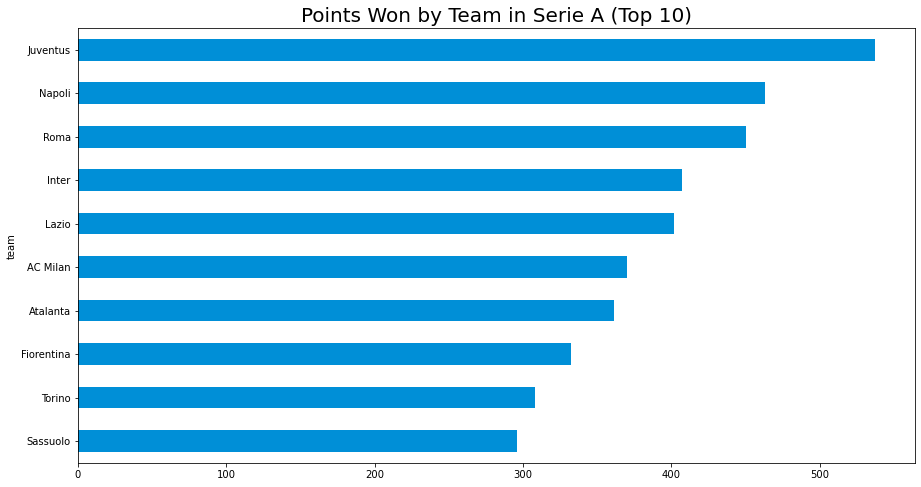

In [31]:
total_points_plot(Serie_A, color = "#008fd7")
plt.title('Points Won by Team in Serie A (Top 10)', fontsize = 20);

**Insight:** Juventus has dominated the La Liga over the period grabbing the highest number of points.

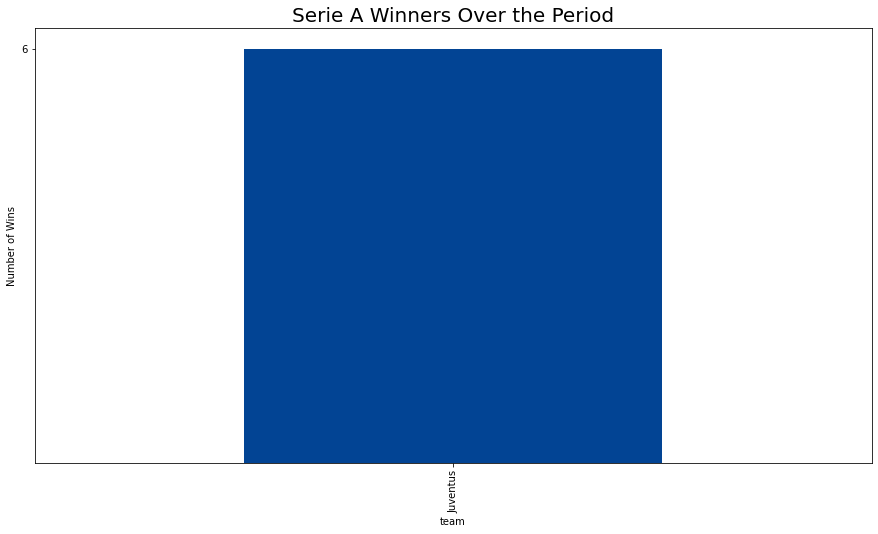

In [32]:
winners_plot(Serie_A, color='#024494')
plt.yticks(ticks = [6])
plt.title("Serie A Winners Over the Period", fontsize = 20 );

**Insight:** Juventus won all six seasons covered in this analysis.

### Ligue_1

In [33]:
# Subset the Ligue_1 

Ligue_1 = df[df.league=='Ligue_1']
Ligue_1.head()

,league,year,position,team,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
468,Ligue_1,2014,1,Paris Saint Germain,38,24,11,3,83,36,83,78.419930,-4.580070,67.778602,28.240364,-7.759636,25.960072,41.818530,7.133794,16.841499,321,116,84.1042,1.1042
469,Ligue_1,2014,2,Lyon,38,22,9,7,72,33,75,62.851829,-9.148171,53.634238,41.708588,8.708588,37.148094,16.486144,8.994296,11.970015,202,136,65.6192,-9.3808
470,Ligue_1,2014,3,Monaco,38,20,11,7,51,26,71,56.608176,5.608176,51.287503,37.618752,11.618752,32.917682,18.369821,8.338964,10.394530,228,132,64.8054,-6.1946
471,Ligue_1,2014,4,Marseille,38,21,6,11,76,42,69,60.634000,-15.366000,57.593614,36.406816,-5.593184,33.366435,24.227179,6.342344,8.526785,201,126,66.5144,-2.4856
472,Ligue_1,2014,5,Saint-Etienne,38,19,12,7,51,30,69,46.493418,-4.506582,41.172762,38.244494,8.244494,33.674206,7.498556,9.445227,11.279169,198,124,58.6982,-10.3018


In [34]:
# Let's look at a statistical summary

Ligue_1.describe()

,year,position,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2016.500000,10.500000,36.316667,13.441667,9.433333,13.441667,46.750000,46.750000,49.758333,45.141445,-1.608555,40.666615,45.141445,-1.608555,40.666615,4.736952e-16,11.028938,11.032684,171.991667,171.991667,49.863386,0.105053
std,1.714986,5.790459,3.781830,5.542496,3.201190,5.308620,17.802488,12.523759,16.138578,13.916616,7.339592,12.726241,9.557286,6.667840,8.809796,1.756691e+01,2.183033,2.629136,62.550752,38.000994,12.823214,7.170049
min,2014.000000,1.000000,27.000000,3.000000,2.000000,2.000000,22.000000,19.000000,13.000000,24.651134,-30.963020,21.610759,22.434996,-18.333389,21.670482,-3.464838e+01,6.342344,6.414753,91.000000,86.000000,28.007300,-24.531500
25%,2015.000000,5.750000,38.000000,10.000000,7.000000,10.000000,35.000000,38.000000,38.000000,36.418133,-5.418713,32.492412,39.543448,-6.668538,35.957559,-1.088878e+01,9.527948,9.489468,132.750000,145.000000,41.640650,-4.630250
50%,2016.500000,10.500000,38.000000,12.000000,9.000000,14.000000,42.000000,46.500000,48.000000,42.798649,-0.782581,37.977506,45.156741,-1.561617,41.012219,-2.314358e+00,11.059302,10.556923,164.500000,171.500000,48.354900,-0.253950
75%,2018.000000,15.250000,38.000000,16.000000,11.000000,17.000000,53.000000,55.000000,56.500000,48.286188,3.471583,44.136797,51.089661,3.058983,46.945436,6.016496e+00,12.451429,12.058084,192.750000,196.250000,55.547400,4.426950
max,2019.000000,20.000000,38.000000,30.000000,18.000000,26.000000,108.000000,83.000000,96.000000,95.344060,14.174308,86.223077,73.283328,14.886751,68.008525,5.786981e+01,17.421286,21.270465,478.000000,281.000000,90.274800,19.155400


**Insight:** The highest number of points recorded in a single season of __Ligue 1__ is 96.

**Insight:** A maximum of 38 matches are played per team per season in the __Serie A__.

In [35]:
# What's the average number of points picked up by Ligue 1 teams over the period?

Ligue1_ptsAvg = avg_points(Ligue_1)

print("An average of", "\033[1m" + f"{Ligue1_ptsAvg}" + "\033[0m", "pts were picked up by Ligue 1 teams over the period.")

An average of 205 pts were picked up by Ligue 1 teams over the period.


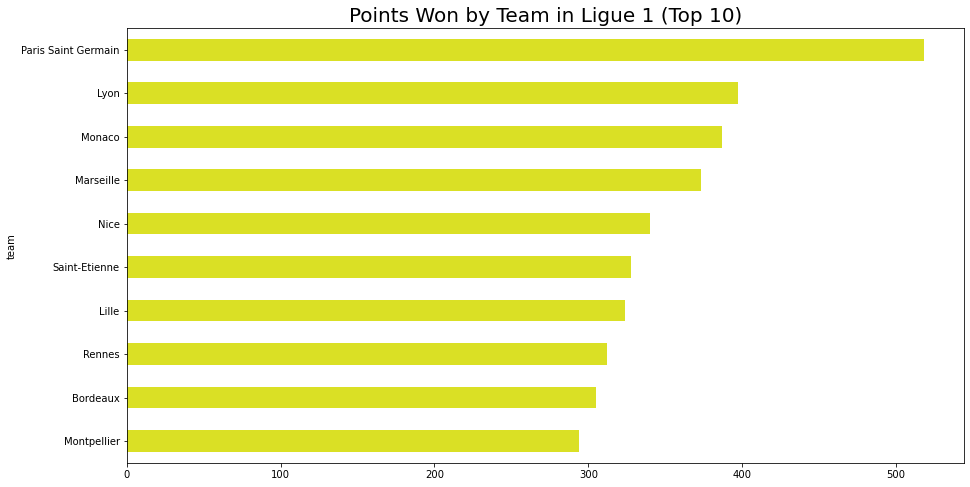

In [36]:
total_points_plot(Ligue_1, color = "#dae025")
plt.title('Points Won by Team in Ligue 1 (Top 10)', fontsize = 20);

**Insight:** Paris Saint Germain has dominated the Ligue 1 over the period grabbing the highest number of points.

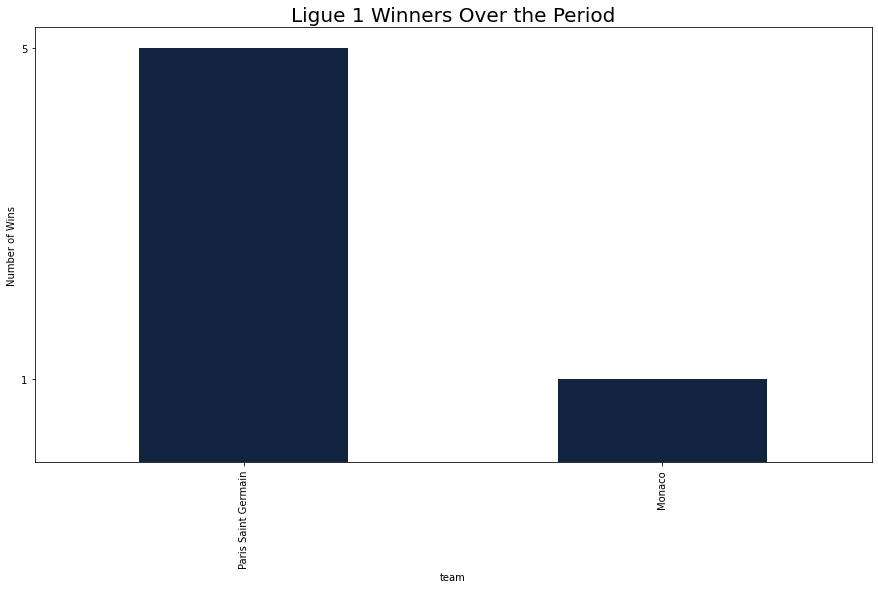

In [37]:
winners_plot(Ligue_1, color='#12233f')
plt.yticks(ticks = [1, 5])
plt.title("Ligue 1 Winners Over the Period", fontsize = 20 );

**Insight:** Paris Saint Germain won five of the six seasons covered in this analysis while Monaco won the other.

### RFPL

In [38]:
# Subset the RFPL

RFPL = df[df.league=='RFPL']
RFPL.head()

,league,year,position,team,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
588,RFPL,2014,1,Zenit St. Petersburg,30,20,7,3,58,17,67,50.517910,-7.482090,46.746533,16.838674,-0.161326,16.084399,30.662134,7.551196,11.631755,228,87,63.8448,-3.1552
589,RFPL,2014,2,CSKA Moscow,30,19,3,8,67,27,60,51.022039,-15.977961,44.233554,28.801404,1.801404,26.538577,17.694977,8.137093,15.635261,324,106,54.5644,-5.4356
590,RFPL,2014,3,FC Krasnodar,30,17,9,4,52,27,60,43.731498,-8.268502,37.697290,28.492608,1.492608,25.475507,12.221783,7.180436,9.945586,224,131,51.0937,-8.9063
591,RFPL,2014,4,Dinamo Moscow,30,14,8,8,53,36,50,44.779138,-8.220862,41.007759,38.761823,2.761823,35.744719,5.263040,6.543688,10.120363,205,172,43.8898,-6.1102
592,RFPL,2014,5,Rubin Kazan,30,13,9,8,39,33,48,42.703970,3.703970,38.788628,25.433679,-7.566321,22.416585,16.372043,8.259731,7.766251,191,146,53.1648,5.1648


In [39]:
# Let's look at a statistical summary

RFPL.describe()

,year,position,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,96.00000,96.000000,96.0,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,9.600000e+01,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2016.50000,8.500000,30.0,10.885417,8.229167,10.885417,34.885417,34.885417,40.885417,33.648690,-1.236726,30.142857,33.648690,-1.236726,30.142857,2.133710e-16,10.697584,10.697584,179.760417,179.760417,40.888084,0.002668
std,1.71679,4.633971,0.0,4.555782,2.535969,4.393464,11.681627,10.363773,13.022143,9.357747,5.337627,8.512091,8.173421,5.887153,7.442254,1.342570e+01,2.431317,2.649108,66.381790,43.551722,10.039479,6.319369
min,2014.00000,1.000000,30.0,2.000000,3.000000,2.000000,13.000000,15.000000,13.000000,15.064491,-15.977961,13.166872,16.838674,-16.493856,16.084399,-3.545204e+01,6.543688,5.661046,76.000000,87.000000,17.907700,-23.998500
25%,2015.00000,4.750000,30.0,7.000000,6.000000,8.000000,25.000000,28.000000,31.000000,27.129795,-4.586700,24.795291,27.218191,-4.756895,24.626834,-9.608227e+00,8.927048,8.867418,132.000000,146.750000,33.577750,-4.228525
50%,2016.50000,8.500000,30.0,10.000000,8.000000,11.000000,33.000000,33.000000,38.500000,31.605375,-1.478929,28.217528,33.000866,-0.188705,29.374306,-4.939661e-01,10.439436,10.453681,162.000000,174.500000,39.122200,0.074650
75%,2018.00000,12.250000,30.0,14.000000,10.000000,14.000000,42.250000,42.250000,50.000000,40.003500,2.317407,35.270653,38.860233,2.825674,35.260337,8.717024e+00,12.171317,12.216135,217.250000,208.750000,47.800575,4.325675
max,2019.00000,16.000000,30.0,22.000000,15.000000,22.000000,67.000000,64.000000,72.000000,62.392129,12.896445,54.095089,55.725229,15.454632,51.953859,3.219150e+01,19.044158,17.711305,372.000000,318.000000,63.844800,13.724000


**Insight:** The highest number of points recorded in a single season of __RFPL__ is 72.

**Insight:** A maximum of 30 matches are played per team per season in the __RFPL__.

In [40]:
# What's the average number of points picked up by RFPL teams over the period?

RFPL_ptsAvg = avg_points(RFPL)

print("An average of", "\033[1m" + f"{RFPL_ptsAvg}" + "\033[0m", "pts were picked up by RFPL teams over the period.")

An average of 157 pts were picked up by RFPL teams over the period.


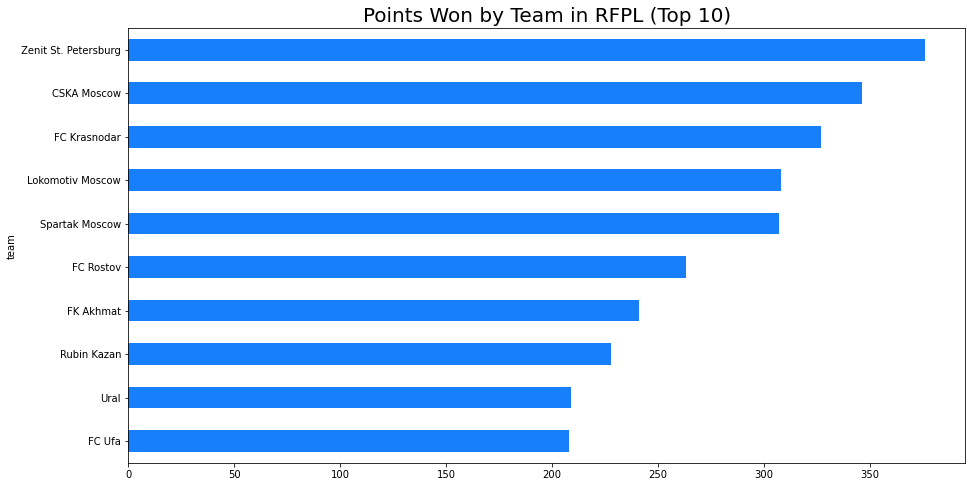

In [41]:
total_points_plot(RFPL, color = "#177ff9")
plt.title('Points Won by Team in RFPL (Top 10)', fontsize = 20);

**Insight:** Zenit St. Petersburg has dominated the RFPL over the period grabbing the highest number of points.

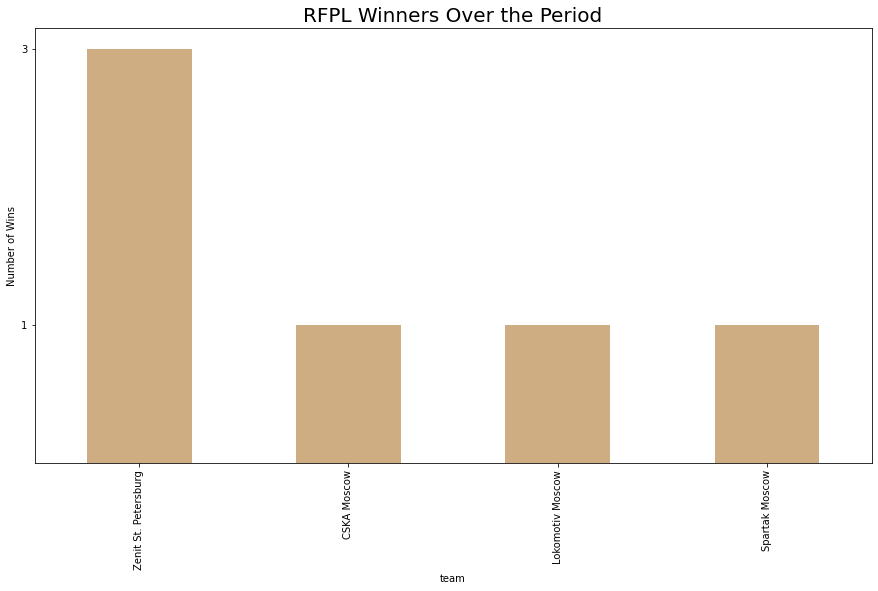

In [42]:
winners_plot(RFPL, color='#cfad82')
plt.yticks(ticks = [1, 3])
plt.title("RFPL Winners Over the Period", fontsize = 20 );

**Insight:** The winning teams in __RFPL__ are Zenit St. Petersburg (3 seasons), CSKA Moscow (1 season), Lokomotiv Moscow (1 season), and Spartak Moscow (1 season).

## Bundesliga

In [43]:
# Subset the BUndesliga

Bundesliga = df[df.league=='Bundesliga']
Bundesliga.head()

,league,year,position,team,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
240,Bundesliga,2014,1,Bayern Munich,34,25,4,5,80,18,79,66.205745,-13.794255,61.659256,21.938729,3.938729,20.423172,41.236085,5.761476,25.022717,388,83,73.6116,-5.3884
241,Bundesliga,2014,2,Wolfsburg,34,20,9,5,72,38,69,58.347731,-13.652269,55.316626,38.822021,0.822021,36.419255,18.897371,9.136319,10.289876,172,164,59.9509,-9.0491
242,Bundesliga,2014,3,Borussia M.Gladbach,34,19,9,6,53,26,66,51.741572,-1.258428,49.468232,36.343299,10.343299,33.312193,16.156039,12.751108,12.783803,221,198,57.0078,-8.9922
243,Bundesliga,2014,4,Bayer Leverkusen,34,17,10,7,62,37,61,49.155699,-12.844301,48.397918,34.720386,-2.279614,30.173724,18.224194,5.693289,7.347595,246,108,55.3396,-5.6604
244,Bundesliga,2014,5,Augsburg,34,15,4,15,43,43,49,43.911698,0.911698,37.720148,46.659608,3.659608,43.628491,-5.908343,7.625900,10.402360,134,221,45.4960,-3.5040


In [44]:
# Let's look at a statistical summary

Bundesliga.describe()

,year,position,matches,wins,draws,loses,goals_scored,goals_conceded,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
count,108.000000,108.000000,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,1.080000e+02,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,2016.500000,9.500000,34.0,12.824074,8.351852,12.824074,49.962963,49.962963,46.824074,48.699397,-1.263566,45.094381,48.699397,-1.263566,45.094381,3.618505e-16,11.170879,11.170879,202.935185,202.935185,47.140381,0.316307
std,1.715787,5.212315,0.0,5.212904,2.613104,4.773033,15.860328,11.981236,14.755850,13.365678,6.549721,13.143829,10.139608,5.905770,9.784769,2.004250e+01,2.900721,4.108193,70.742956,44.083242,12.024165,6.309963
min,2014.000000,1.000000,34.0,3.000000,3.000000,2.000000,25.000000,17.000000,19.000000,31.646730,-19.738336,27.363924,20.794377,-14.455666,19.278818,-3.528055e+01,5.693289,4.394458,96.000000,83.000000,25.205500,-13.146000
25%,2015.000000,5.000000,34.0,9.000000,7.000000,10.000000,38.000000,42.000000,37.000000,38.737180,-4.302601,35.587823,41.834641,-5.233107,38.938093,-1.406345e+01,9.054368,8.803239,153.750000,172.750000,39.192225,-4.562775
50%,2016.500000,9.500000,34.0,12.000000,8.000000,13.000000,46.000000,50.000000,43.000000,45.730766,-0.702111,42.109068,48.589100,-1.103002,44.918711,-3.553709e+00,10.864652,10.287030,184.000000,206.500000,45.274100,0.064750
75%,2018.000000,14.000000,34.0,15.000000,10.000000,16.000000,58.250000,58.000000,55.000000,54.005998,2.743131,50.657174,54.966211,3.101049,50.702944,8.261728e+00,12.856768,12.089163,232.250000,232.250000,53.135800,4.392950
max,2019.000000,18.000000,34.0,28.000000,15.000000,23.000000,100.000000,75.000000,88.000000,92.851562,10.465999,89.209907,73.120366,16.370737,67.816015,6.634415e+01,20.304275,30.236541,435.000000,309.000000,82.003000,16.115800


**Insight:** The highest number of points recorded in a single season of __Bundesliga__ is 88.

**Insight:** A maximum of 34 matches are played per team per season in the __Bundesliga__.

In [45]:
# What's the average number of points picked up by Bundesliga teams over the period?

Bundesliga_ptsAvg = avg_points(Bundesliga)

print("An average of", "\033[1m" + f"{Bundesliga_ptsAvg}" + "\033[0m", "pts were picked up by Bundesliga teams over the period.")

An average of 210 pts were picked up by Bundesliga teams over the period.


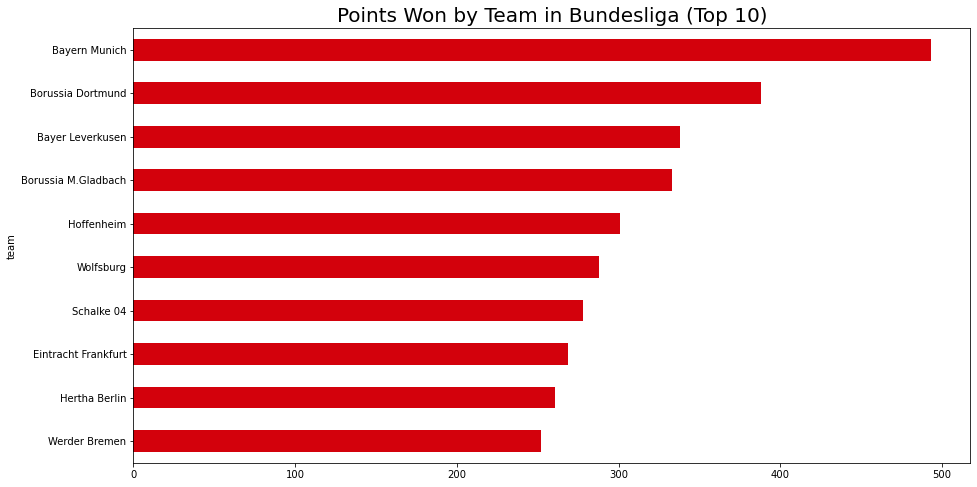

In [46]:
total_points_plot(Bundesliga, color = "#D3010C")
plt.title('Points Won by Team in Bundesliga (Top 10)', fontsize = 20);

**Insight:** Bayern Munich has dominated the Bundesliga over the period grabbing the highest number of points.

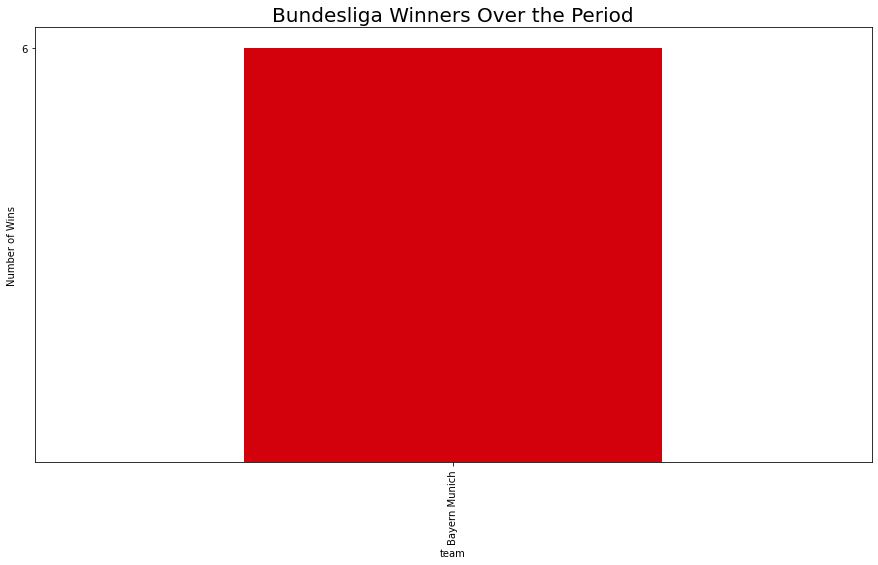

In [47]:
winners_plot(Bundesliga, color='#D3010C')
plt.yticks(ticks = [6])
plt.title("Bundesliga Winners Over the Period", fontsize = 20 );

**Insight:** Bayern Munich won for the six years in __Bundesliga__

### Let's Go Back to Analyzing the Leagues in Aggregate

<Figure size 1080x576 with 0 Axes>

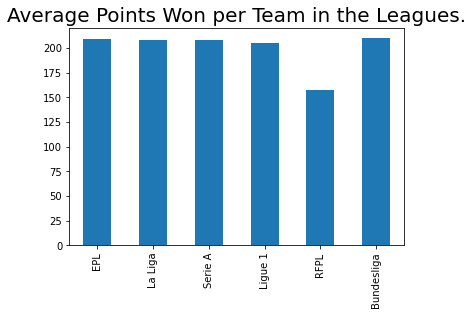

In [48]:
# So, could the number of teams have contributed to the number of 
# points picked up over the period?

# Let's plot the average points picked up
plt.figure(figsize = [15, 8]);

averages_df = pd.DataFrame([epl_ptsAvg, laliga_ptsAvg, SerieA_ptsAvg,
    Ligue1_ptsAvg, RFPL_ptsAvg, Bundesliga_ptsAvg],
    index = ["EPL", "La Liga", "Serie A", "Ligue 1", "RFPL", "Bundesliga"],
    columns = ["Average Points"]    
    );

averages_df.plot(kind = "bar", legend = False);
plt.title("Average Points Won per Team in the Leagues.", fontsize = 20);

**Insight:** On average, the RFPL teams won fewer points than those in other leagues.

In [49]:
temp_df = df.groupby(["year", "league"])[["pts"]].sum()
temp_df.head()

pts
year league          
2014 Bundesliga   836
     EPL         1047
     La_liga     1049
     Ligue_1     1052
     RFPL         659

In [50]:
temp_df2 = temp_df.reset_index()
temp_df2.head()

,year,league,pts
0,2014,Bundesliga,836
1,2014,EPL,1047
2,2014,La_liga,1049
3,2014,Ligue_1,1052
4,2014,RFPL,659


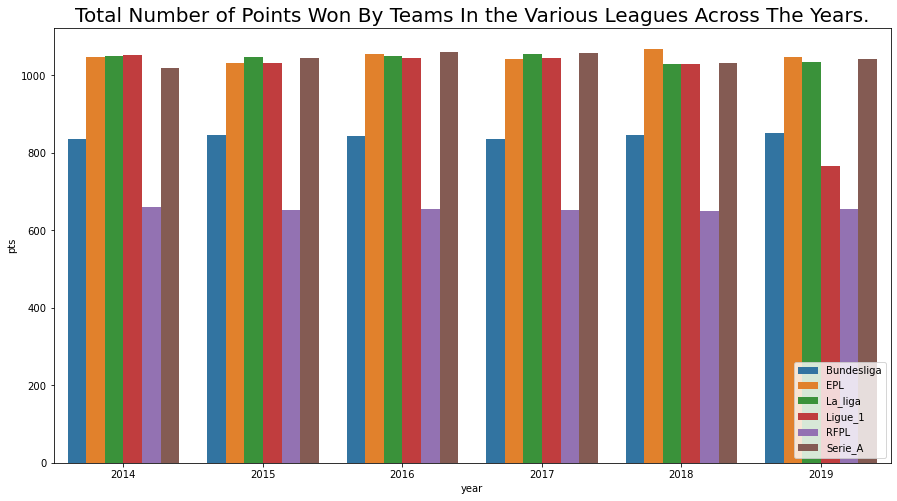

In [51]:
plt.figure(figsize = (15, 8));

sns.barplot(x = "year", y = "pts", hue = "league", data = temp_df2);

plt.legend(loc = "lower right")
plt.title("Total Number of Points Won By Teams In the Various Leagues Across The Years.", fontsize = 20);

**Insight:** Leagues maintain the same range in total points won during the seasons. Also, we see RPFL falling behind in total number of points won.

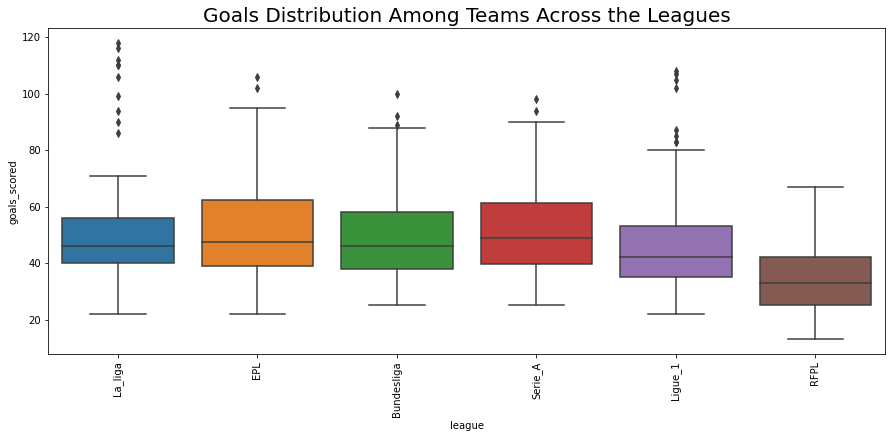

In [52]:
plt.figure(figsize = [15,6])

sns.boxplot(data = df, x = "league", y = "goals_scored")
plt.xticks(rotation = 90)
plt.title("Goals Distribution Among Teams Across the Leagues", fontsize =20);

**Insight:** All the leagues have comparable goal distributions among their teams. Except the RFPL which seems to fall behind on this parameter.

**Insight:** Goal-loving football fans would be drawn away from the RFPL.

In [53]:
df.columns

Index(['league', 'year', 'position', 'team', 'matches', 'wins', 'draws',
       'loses', 'goals_scored', 'goals_conceded', 'pts', 'xG', 'xG_diff',
       'npxG', 'xGA', 'xGA_diff', 'npxGA', 'npxGD', 'ppda_coef', 'oppda_coef',
       'deep', 'deep_allowed', 'xpts', 'xpts_diff'],
      dtype='object')

In [54]:
temp_df3 = df[["xGA", 'xGA_diff', "npxGA", "npxGD", "ppda_coef",
"oppda_coef", "deep", "deep_allowed", "goals_scored", "goals_conceded", "pts", "wins", "draws", "loses"]].copy()
temp_df3.head()

,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,goals_scored,goals_conceded,pts,wins,draws,loses
0,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,110,21,94,30,4,4
1,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,118,38,92,30,2,6
2,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,67,29,78,23,9,6
3,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,70,32,77,22,11,5
4,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,71,45,76,23,7,8


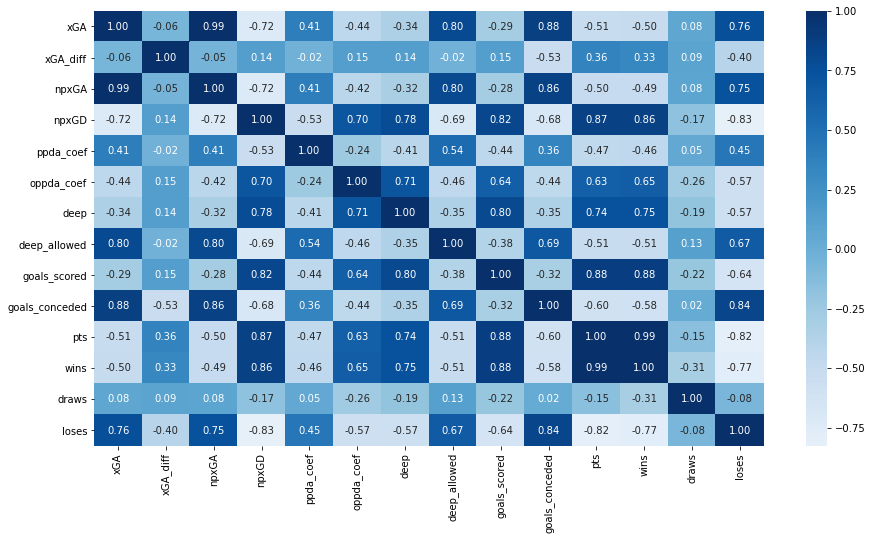

In [55]:
plt.figure(figsize = [15,8])

sns.heatmap(temp_df3.corr(), cmap = "Blues", annot = True, fmt =".2f", center = 0);
plt.yticks(rotation = 0);

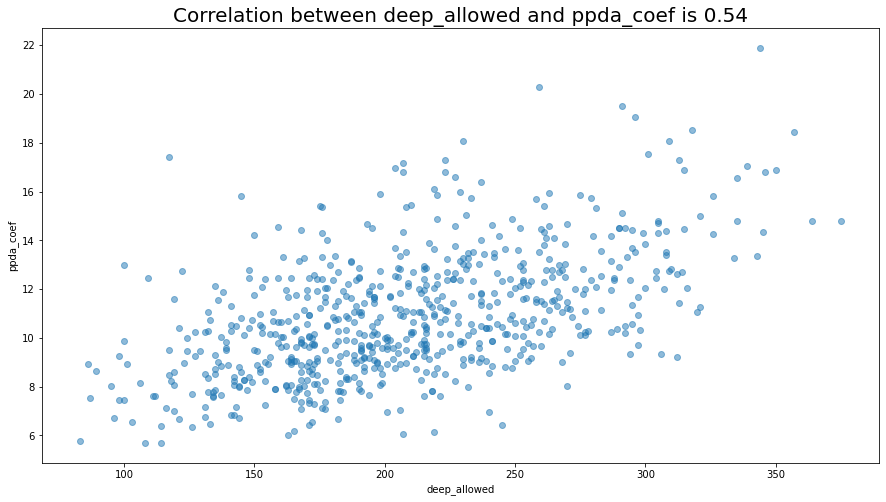

In [56]:
rel("deep_allowed", "ppda_coef")

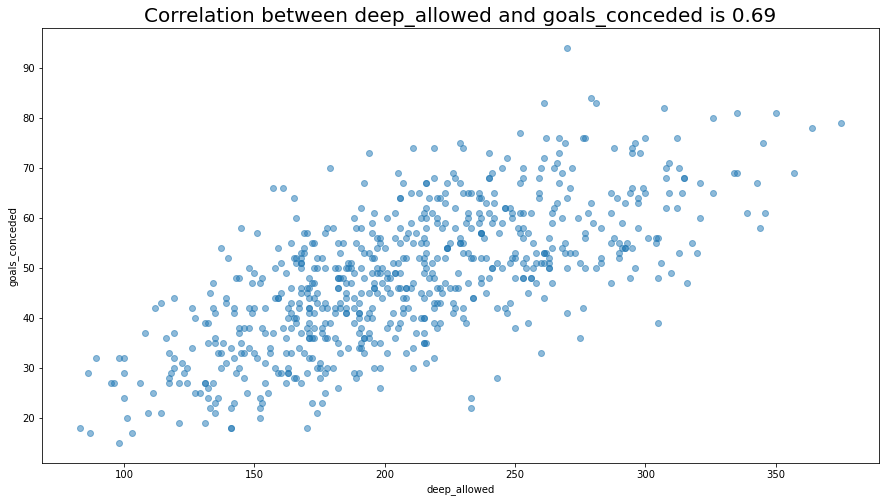

In [57]:
rel("deep_allowed", "goals_conceded")

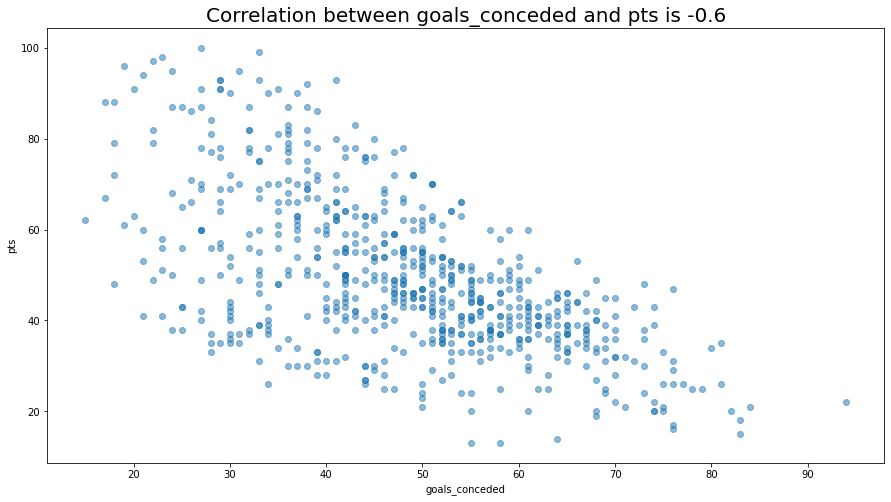

In [58]:
rel("goals_conceded", "pts")

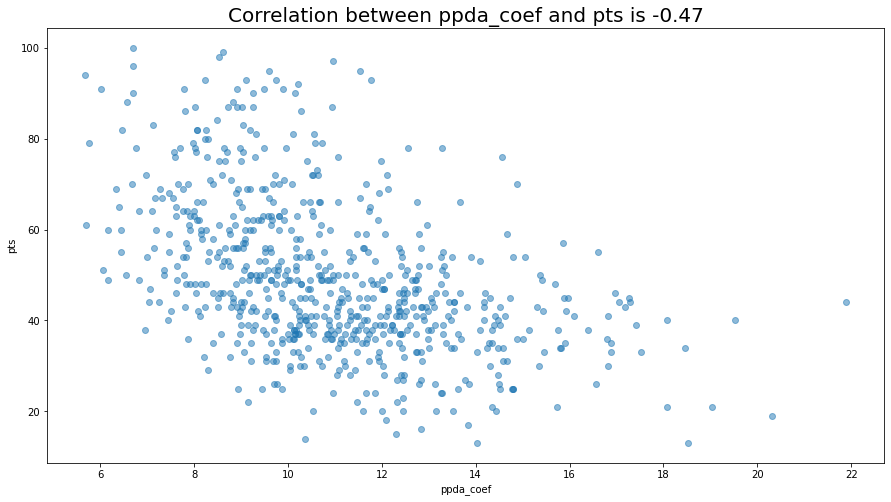

In [59]:
rel("ppda_coef", "pts")

**Insight:** There is a positive correlation between the ppda_coef of a team and the number of deep passes they allow their oponents to make. There is also positive correlation between the number of deep passes a team allows to the the goals they get. Finally, there is a negative correlation between the goals a team concededs and the number of points they get.

**Insight:** Finally, a negative correlation can be seen between the ppda_coef and the number of points a team gets. Since we know that applying higher pressure means a lower ppda_coef and the more points a team, the more lkely they are to be successful in Europe. It is safe to conclude that teams that do not apply higher pressure (which leads to higher ppda_coef) would end up less successful than their counterparts who do.